## Worksheet 3 (Week 3) MATM063: Pandas basics and exploring the data

### 6 Exercises

#### Question 1 (Step 1 of Workflow):

1. Read in the data ’housing’ using the code in Listing 1. Where do you find the data file? In what format is it?

In [2]:
import os
import tarfile
import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path=os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

# execute these functions:
fetch_housing_data() # fetch the data
housing = load_housing_data()
housing # loading data into workspace


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


The data is sourced and downloaded from the GITHUB link (https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz). The fetch_housing_data function downloads this file as a .tgz archive. Inside this archive is a .cvs file (housing) which the load_housing_data function reads it into a Pandas Data Frame.

2. Display the head of the file! Is the header included (i.e. are the column names correctly read in)?

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The header is included and properly read in.

3. Display the types of each attribute! Permanently set the ocean_proximity attribute as type ’category’.

In [4]:
housing["ocean_proximity"] = housing["ocean_proximity"].astype("category")  # Convert to category
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


4. Display if there are any missing values in some (or all) of the attributes!

In [5]:
housing.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

5. Plot the histogramme (with 100 bins) of all numerical attributes and discuss shortly what they tell us! Are there some obvious data flaws visible
in the plots? In which attributes would you expect them?

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

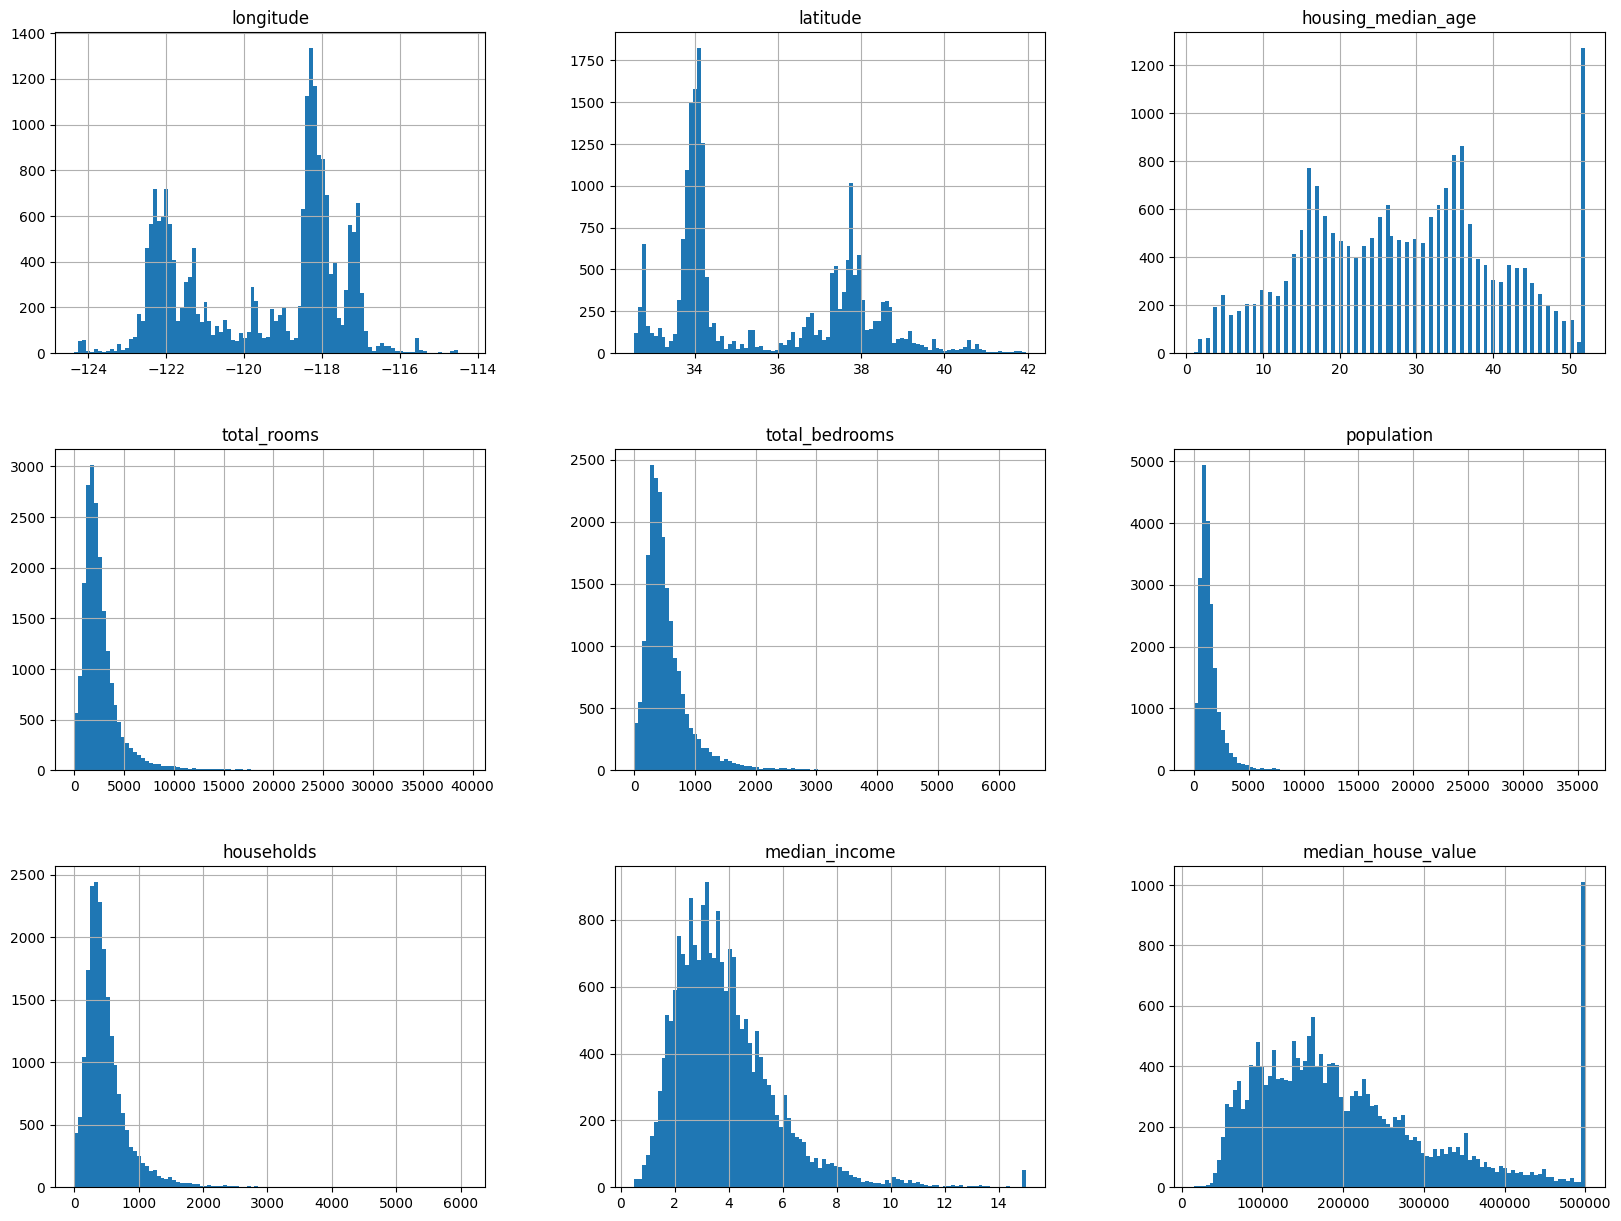

In [6]:
import matplotlib.pyplot as plt
housing.hist(bins=100,figsize=(20,15))

Housing_median_age and median_house_value has two spikes at the extreme largest values, these are data flaws as you would expect the spectrum to slowly decrease at the edges. However, lets say for example that houses of median value above 500,000 are cut-off and kept at this maximum value, this would explain why we have such a sudden spike at such a large value.

### Question 2 (Step 2 of workflow):

Splitting the data set into train and test sets!

1. Split the housing dataset into a test and train set. First, use random picking of instances (with fixed random seed) and create a test set that is 15%
in size of the original set. Display the shape of both test and train sets to see if the ratio of splitting is indeed 15%

In [7]:
from sklearn.model_selection import train_test_split
# purely random sampling method:
train_set, test_set = train_test_split(housing,test_size=0.15,random_state=41)
len(test_set)/(len(train_set)+len(test_set))

0.15

2. Create a stratified shuffle split (20% test set size) where the quantity that should correctly be represented is median_house_value. Plot a
histogramme that shows this distribution.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

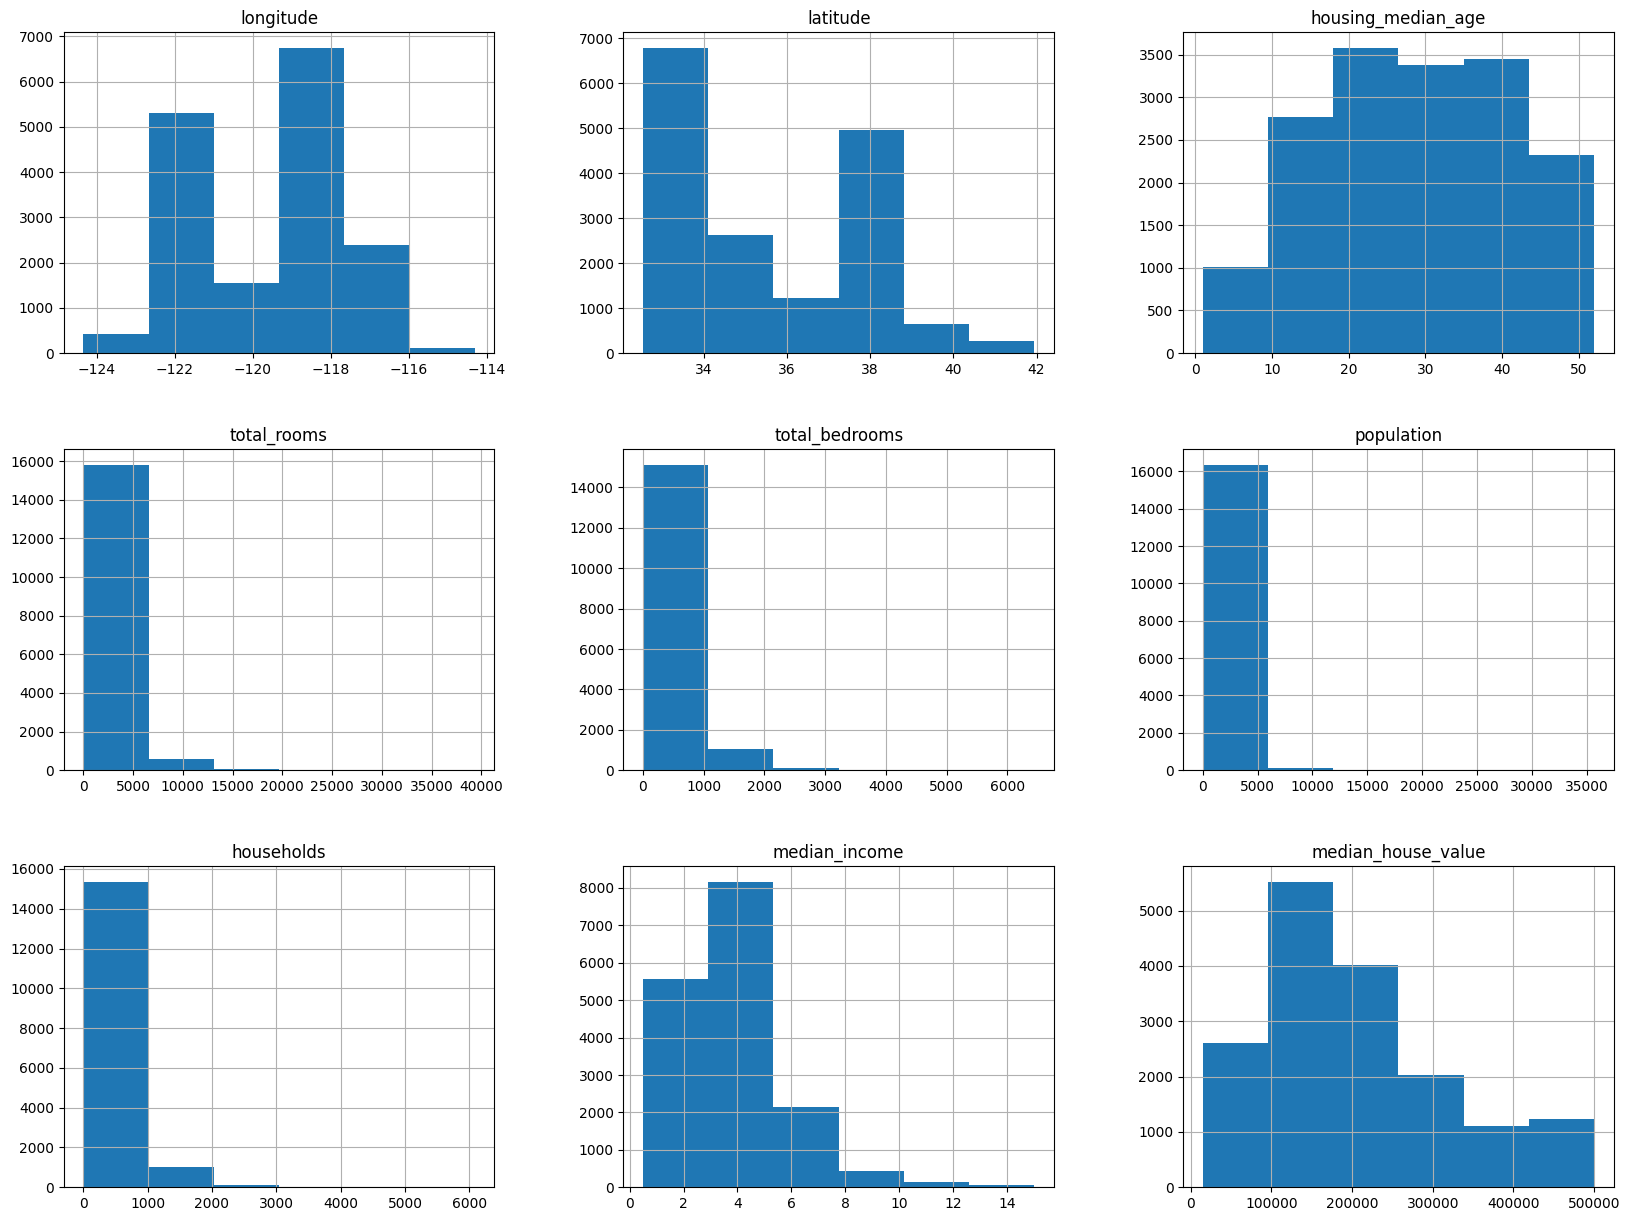

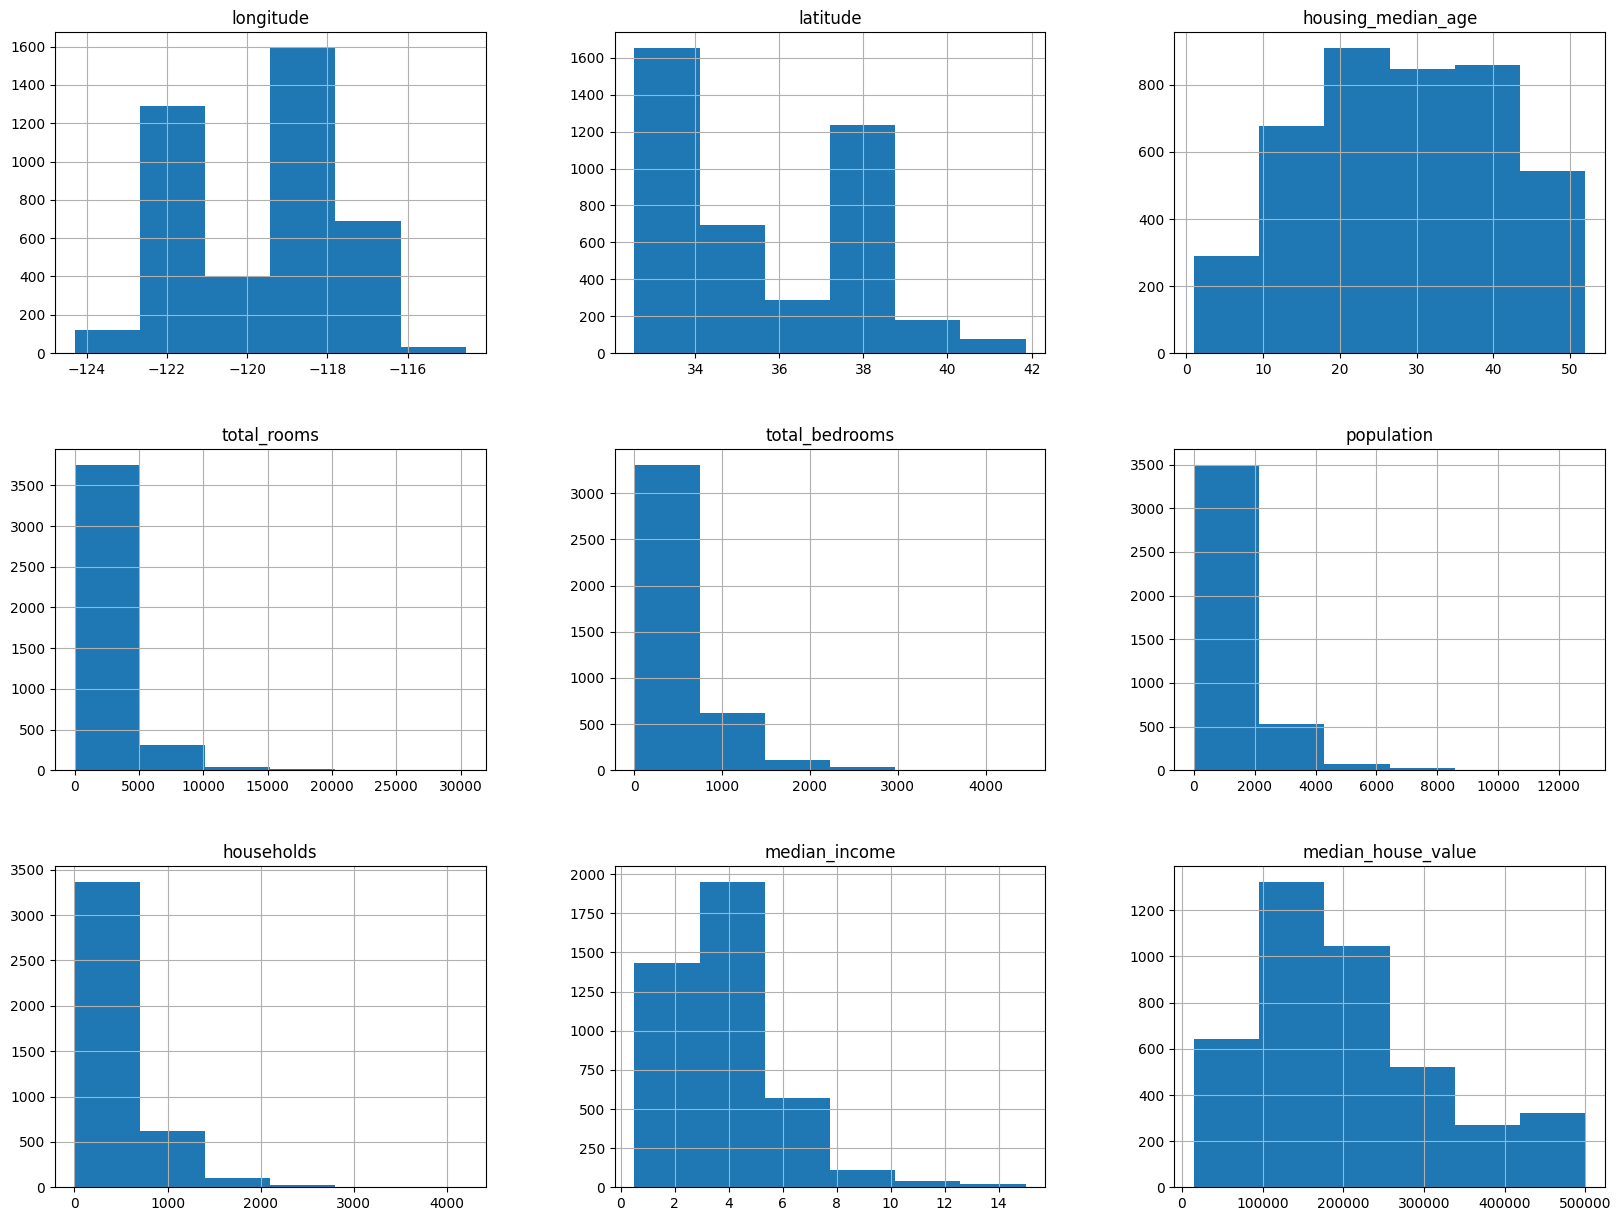

In [10]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_house_value"],
                               bins=[1, 2, 3, 4, 5, np.inf],
                               labels=[100000, 200000, 300000, 400000, 500000])

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=41)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# remove income_cut to bring data back to original state:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

strat_train_set.hist(bins=6,figsize=(20,15)) #training data histograms
strat_test_set.hist(bins=6,figsize=(20,15)) #test data histograms


3. Print the distribution of the median_house_value attribute for the overall dataset with the random split and the stratified split test set (use the
formula from the lecture) SET[’median_house_value’] / len(SET) where SET represents the full, the random split, and the stratified split
datasets.

In [ ]:
print(housing['median_house_value']/len(housing))
print(housing['median_house_value']/len(test_set))
print(housing['median_house_value']/len(strat_test_set))

## Question 3 (Step 3 of workflow):

Explore the training dataset!
1. Calculate the standard correlation coefficient matrix of the housing data set.

In [ ]:
housing.drop("ocean_proximity", axis=1, inplace=True)
corr_matrix = housing.corr()
corr_matrix

2. Assume your quantity of interest is the median_income. Provide the correlation coefficient with respect to this attribute and sort them in ascending
order.

In [ ]:
corr_matrix['median_income'].sort_values(ascending=False)

## Question 4: (Step 4 of workflow)

In the lecture notes, we defined the following attribute combinations.

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

1. Plot the scatter matrix using the following attributes, also plot a scatter plot for just attributes median_house_value over rooms_per_household.

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["rooms_per_household", "bedrooms_per_room", "population_per_household", "median_income", "median_house_value"]

scatter_matrix(housing[attributes], figsize=(12, 8)) # LEFT

housing.plot(kind="scatter", x="median_house_value", y="rooms_per_household", alpha=0.1) # RIGHT

2. As comparison, print out the standard correlation coefficients relative to median_house_value (sort them as you like). Discuss: (i) is the
negative correlation of bedrooms_per_room to median_house_value visible in the scatter matrix; and (ii) do we see a positive correlation of
median_house_value and rooms_per_household? What problem could impact our capability to infer from the picture such correlation?


In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=True)

(i) In terms of median houes value, it is definitely the most negative sloped correlation (-0.26 approx). What's more, the results are quite spread out showing weak correlation between the two attributes. But yes it is visible

(ii) It is slightly positive at a value of 0.15 approx. Unfortunately, because the scale of the graph is set from the lowest to the highest value, we see a 'zoomed-out' picture which doesn't allow us to properly view the bulk of results. This means that we are unable to see a positive gradient and almost see the graph as a straight line. This affects our ability to be able to determine that there is in fact a positive correlation. Luckily, the corr_matrix function returns the true correlation values. 

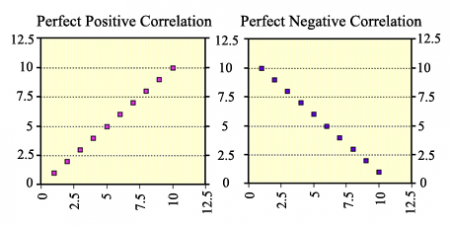